In [77]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import read_wave
from thinkdsp import decorate
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

Упражнение 3.2

In [78]:
class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / (2 * np.pi)
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

In [79]:
signalSawChirp = SawtoothChirp(start = 220, end = 880)
waveSawChirp = signalSawChirp.make_wave(duration = 1, framerate = 5000)
waveSawChirp.apodize()
waveSawChirp.make_audio()

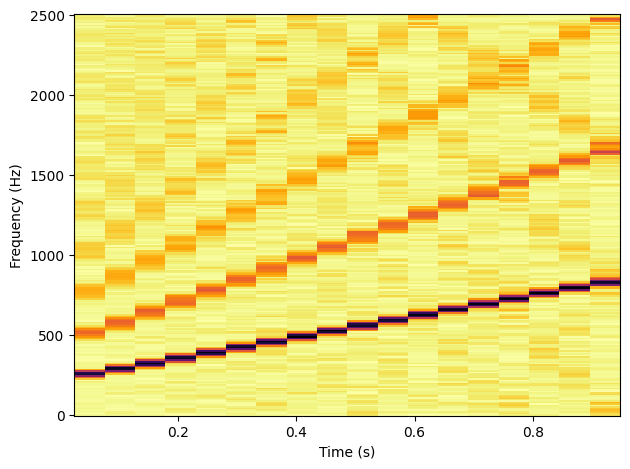

In [80]:
sg = waveSawChirp.make_spectrogram(512)
sg.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Отскакивающие линии говорят о частоте заворачивания в 2500 Гц. В аудиофайле это соответствует сопутствующему писку.

Упражнение 3.3

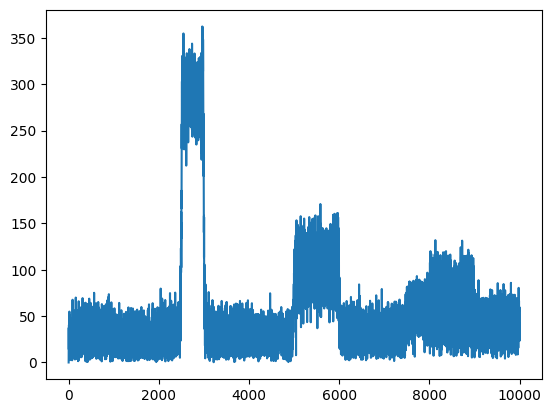

In [81]:
signalSawChirp2 = SawtoothChirp(start = 2500, end = 3000)
waveSawChirp2 = signalSawChirp2.make_wave(duration = 1, framerate = 20000)
spectrumSawChirp2 = waveSawChirp2.make_spectrum()
spectrumSawChirp2.plot()
waveSawChirp2.apodize()
waveSawChirp2.make_audio()

Обычный пилообразный сигнал частотой 2.5 кГц имеет гармоники на частотах 5 кГц, 7.5 кГц и т.д.

Пилообразный сигнал частотой 3 кГц имеет гармоники на частотах 6 кГц, 9 кГц и т.д.

На спектре чирпа, который меняется от 2.5 кГц до 3 кГц мы видим набор гармоник: от 2.5 до 3 кГц, от 5 до 6 кГц, от 7.5 до 9 кГц

(Конечно же не без сопутствующих заворотов)

Упражнение 3.4

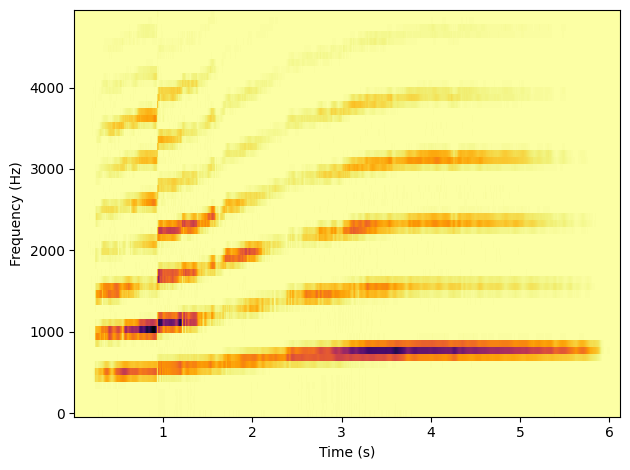

In [82]:
glisWave = read_wave('72475__rockwehrmann__glissup02.wav')
glisWave.make_audio()
glisWave.make_spectrogram(512).plot(high = 5000)
decorate(xlabel = 'Time (s)', ylabel = 'Frequency (Hz)')

Упражнение 3.5

In [83]:
class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1 = 1.0 / self.start
        l2 = 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        dts = np.diff(ts, prepend = 0)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

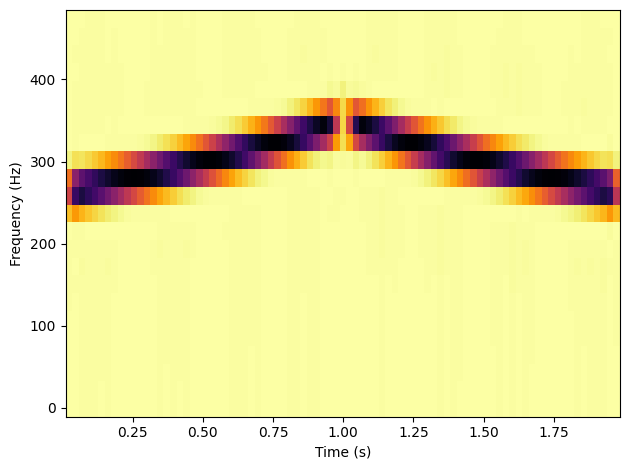

In [84]:
signalTrombone1 = TromboneGliss(262, 349)
signalTrombone2 = TromboneGliss(349, 262)
waveTrombone1 = signalTrombone1.make_wave(duration = 1)
waveTrombone1.apodize()
waveTrombone2 = signalTrombone2.make_wave(duration = 1)
waveTrombone2.apodize()
waveTrombone = waveTrombone1 | waveTrombone2
sg1 = waveTrombone.make_spectrogram(512)
sg1.plot(high = 500)
decorate(xlabel = 'Time (s)', ylabel = 'Frequency (Hz)')
waveTrombone.make_audio()

Даже в таком диапазоне частот на спектрограмме видно, что зависимость частоты от времени имеет не линейный, а экспоненциальный характер.

Упражнение 3.6

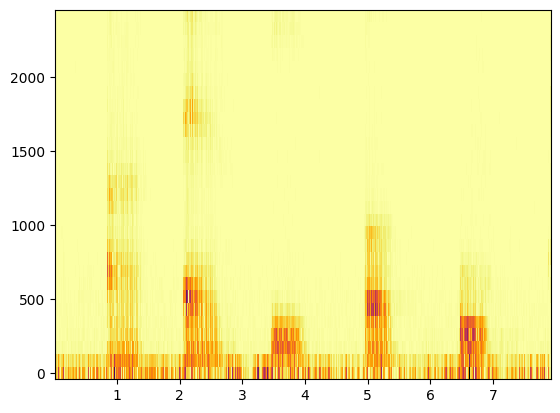

In [85]:
vowelsWave = read_wave('87778__marcgascon7__vocals.wav')
vowelsWaveSg = vowelsWave.make_spectrogram(512)
vowelsWaveSg.plot(high = 2500)
vowelsWave.make_audio()

Посмотрим на спектры отдельных звуков:

In [86]:
waveA = vowelsWave.segment(start = 0.9, duration = 0.5)
waveE = vowelsWave.segment(start = 2.1, duration = 0.5)
waveI = vowelsWave.segment(start = 3.5, duration = 0.5)
waveO = vowelsWave.segment(start = 4.9, duration = 0.5)
waveY = vowelsWave.segment(start = 6.5, duration = 0.5)

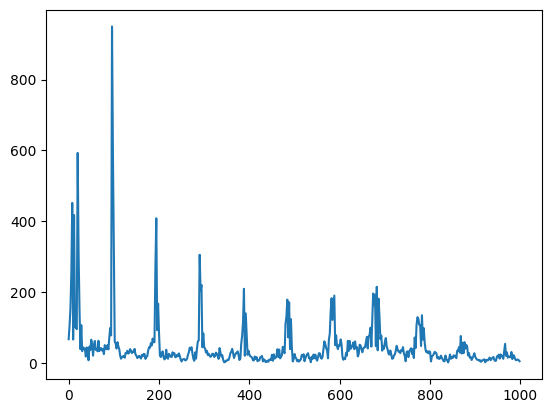

In [87]:
waveA.make_spectrum().plot(high = 1000)
waveA.make_audio()

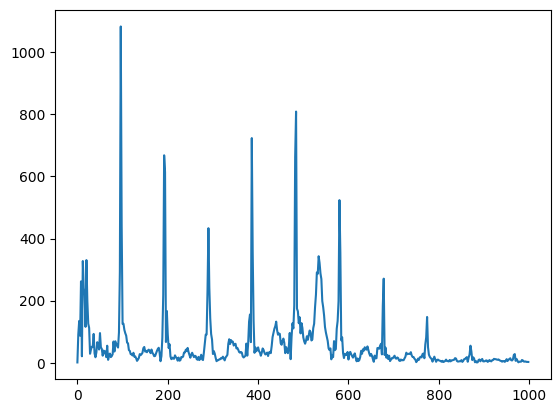

In [88]:
waveE.make_spectrum().plot(high = 1000)
waveE.make_audio()

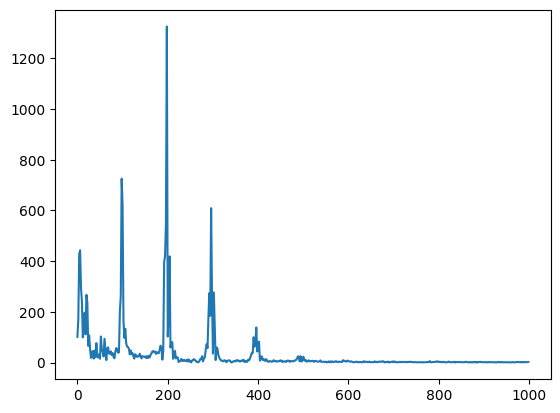

In [89]:
waveI.make_spectrum().plot(high = 1000)
waveI.make_audio()

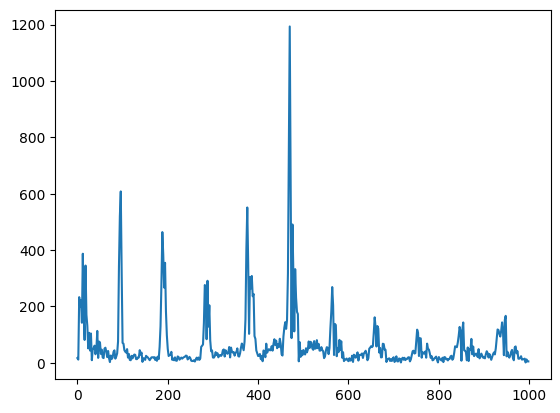

In [90]:
waveO.make_spectrum().plot(high = 1000)
waveO.make_audio()

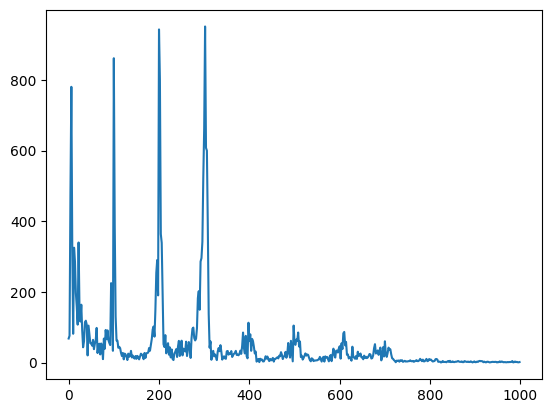

In [91]:
waveY.make_spectrum().plot(high = 1000)
waveY.make_audio()

Видно, что спектры гласных значительно различаются, однако без дополнительных знаний определить гласную по спектру не представляется возможным. 